In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart.csv")

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


data is clean

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


                                    Balance of Data

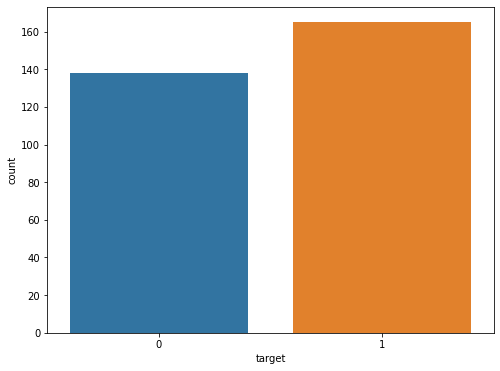

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
plt.show()

                            Categorical/Numerical Data Identification

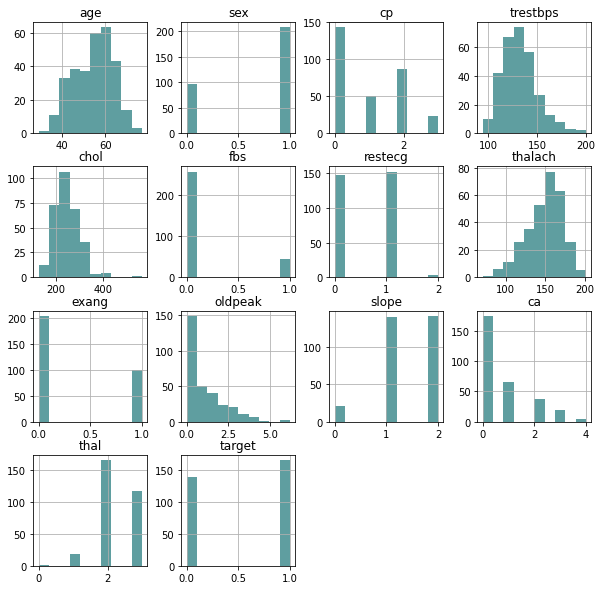

In [9]:
df.hist(figsize = (10,10), color = "#5F9EA0")
plt.show() 


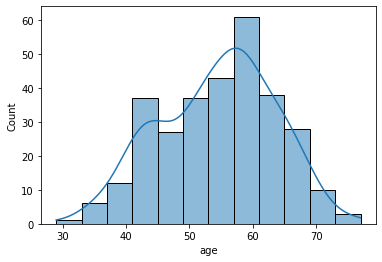

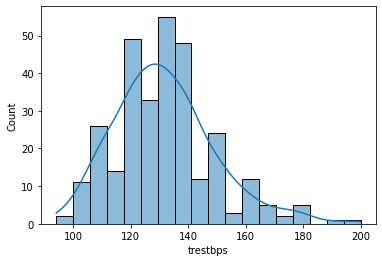

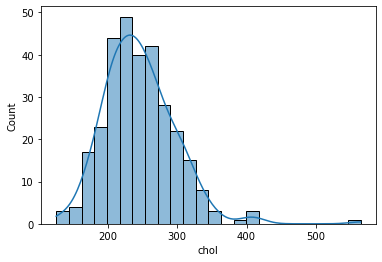

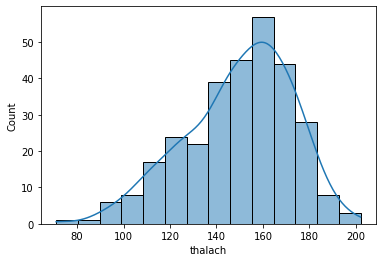

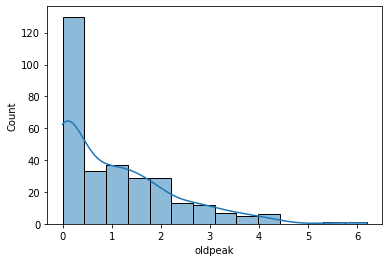

In [10]:
for i in ['age', 'trestbps', 'chol',  'thalach', 'oldpeak']:
    sns.histplot(df[i],kde= True)
    plt.show()

                            Data does not follow Normal Distribution

                                Outliers Check

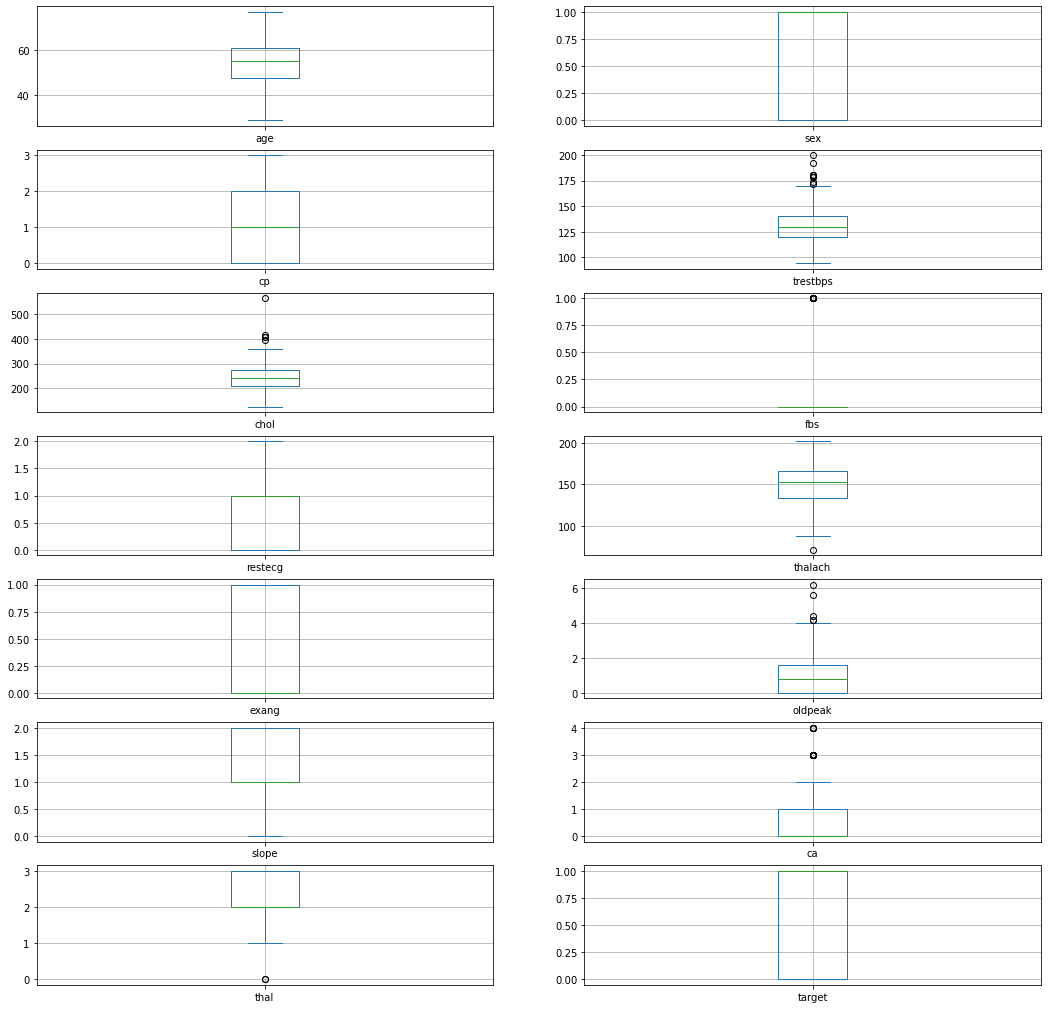

In [11]:
df.plot(kind='box', subplots=True, layout=(7,2), sharex=False,sharey=False ,figsize =(18,18),grid=True)
plt.show()

                        Trestbps and cholestrol are ones containing Outliers

In [12]:
correllation = df.corr()
correllation['target'].sort_values(ascending=True)

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [15]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [16]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
categorical_val.remove("target")

In [49]:
df1 = pd.read_csv("heart.csv")

In [52]:
df1.drop(["target"],axis = 1,inplace = True)

In [53]:
dataset = pd.get_dummies(df1, columns = categorical_val)
dataset

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(dataset,df["target"],test_size=0.3)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [56]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = ensemble.RandomForestClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(Y_test, y_pred)))

clf_report = classification_report(Y_test, y_pred)

Accuracy : 0.8241758241758241


In [57]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        47
           1       0.78      0.89      0.83        44

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



<AxesSubplot:>

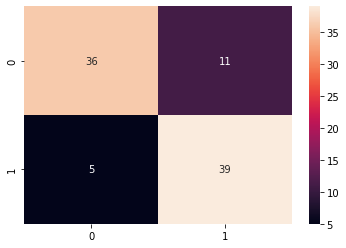

In [58]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)

In [59]:
Y_test.value_counts()

0    47
1    44
Name: target, dtype: int64

In [60]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =7, metric="minkowski",p=2)
classifier.fit(X_train,Y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(Y_test, y_pred_knn)))

Accuracy : 0.7692307692307693


e:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

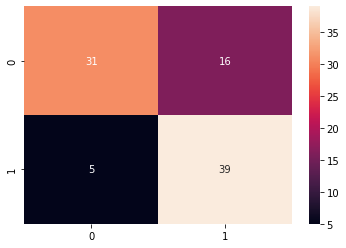

In [61]:
sns.heatmap(confusion_matrix(Y_test,y_pred_knn),annot=True)

In [62]:
from sklearn.linear_model import LogisticRegression
classifier_1 = LogisticRegression()
classifier_1.fit(X_train,Y_train)
y_pred_LR = classifier_1.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(Y_test, y_pred_LR)))

Accuracy : 0.7912087912087912


<AxesSubplot:>

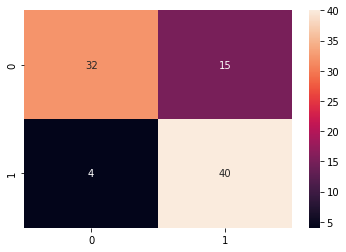

In [63]:
sns.heatmap(confusion_matrix(Y_test,y_pred_LR),annot=True)

In [64]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,Y_train)
y_pred_svc = svc_model.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(Y_test, y_pred_svc)))

Accuracy : 0.8131868131868132


<AxesSubplot:>

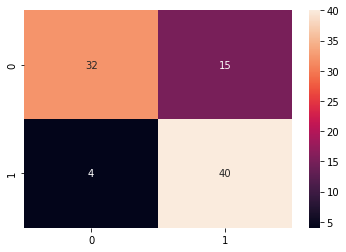

In [65]:
sns.heatmap(confusion_matrix(Y_test,y_pred_LR),annot=True)

In [66]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [67]:
X_test

array([[-0.49993704, -0.05451779,  1.14118391, ..., -0.31046021,
        -1.10431526,  1.32573593],
       [-0.61482156,  0.87155779, -1.10290176, ..., -0.31046021,
        -1.10431526,  1.32573593],
       [-0.72970608,  0.21007523,  0.4145276 , ..., -0.31046021,
         0.90553851, -0.75429803],
       ...,
       [ 0.30425461, -0.71600036,  0.69236677, ..., -0.31046021,
         0.90553851, -0.75429803],
       [ 0.30425461, -1.2451864 , -0.46173442, ..., -0.31046021,
        -1.10431526,  1.32573593],
       [ 0.41913913,  2.85600548, -0.05566178, ..., -0.31046021,
         0.90553851, -0.75429803]])

In [68]:
import joblib

In [35]:
np.array(dataset.head(1))

array([[ 63. , 145. , 233. , 150. ,   2.3,   1. ,   0. ,   1. ,   0. ,
          0. ,   0. ,   1. ,   0. ,   1. ,   1. ,   0. ,   0. ,   1. ,
          0. ,   1. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   1. ,   0. ,   0. ]])

In [36]:
l=[1,2,3,4,5]
data = pd.DataFrame(np.array(l).reshape(1,5))

data

,0,1,2,3,4
0,1,2,3,4,5


In [37]:
X_test.shape

(91, 31)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
joblib.dump(model,r"model.pkl")

['model.pkl']

In [39]:
import pickle

In [40]:
model_rf = RandomForestClassifier()
model_knn = KNeighborsClassifier(n_neighbors =7, metric="minkowski",p=2)
model_lr = LogisticRegression()
model_svc = SVC()

#Training model
model_rf.fit(X_train, Y_train)
model_knn.fit(X_train, Y_train)
model_lr.fit(X_train, Y_train)
model_svc.fit(X_train, Y_train)

#Prdeictions
y_pred_rf = model_rf.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_svc = model_svc.predict(X_test)

#Testing the accuracy of model
acc_thres = 95
acc_rf = accuracy_score(Y_test, y_pred_rf)
acc_knn = accuracy_score(Y_test, y_pred_knn)
acc_lr = accuracy_score(Y_test, y_pred_lr)
acc_svc = accuracy_score(Y_test, y_pred_svc)

#List of Accuracy
acc_list = [acc_rf,acc_knn,acc_lr,acc_svc]

#Getting best Model
if max(acc_list) > acc_thres:
    best_model_index = acc_list.index((max(acc_list)))
    mod_list = [model_rf,model_knn,model_lr,model_svc]
#Dumping Model
    joblib.dump(model_rf,r"model.pkl")

e:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [42]:
column = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal',]

categorical_val = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

L = [63,1,3,145,233,1,0,150,0,2.3,0,0,1]

data = pd.DataFrame(np.array(L).reshape(1,13), columns = column)

dataset = pd.get_dummies(data, columns = categorical_val)
dataset

,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_3.0,fbs_1.0,restecg_0.0,exang_0.0,slope_0.0,ca_0.0,thal_1.0
0,63.0,145.0,233.0,150.0,2.3,1,1,1,1,1,1,1,1


In [43]:
dk = df.head(1)
dk

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [44]:
pd.get_dummies(dk,columns=categorical_val)

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_3,fbs_1,restecg_0,exang_0,slope_0,ca_0,thal_1
0,63,145,233,150,2.3,1,1,1,1,1,1,1,1,1


In [45]:
pd.get_dummies(df.head(3),columns=categorical_val)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,fbs_0,fbs_1,restecg_0,restecg_1,exang_0,slope_0,slope_2,ca_0,thal_1,thal_2
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,1,0,1,1,0,1,1,0
1,37,130,250,187,3.5,1,0,1,0,1,...,1,0,0,1,1,1,0,1,0,1
2,41,130,204,172,1.4,1,1,0,1,0,...,1,0,1,0,1,0,1,1,0,1


In [ ]:
L

[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]

In [ ]:
df.loc[len(df.index)] = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0,1]
df.tail()

ValueError: cannot set a row with mismatched columns

In [ ]:
df.drop(["target"],axis=1,inplace=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


In [ ]:
x = pd.get_dummies(df.tail(3),columns=categorical_val)
x.tail(1)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,restecg_1,exang_0,exang_1,slope_0,slope_1,ca_0,ca_1,thal_1,thal_2,thal_3
303,63,145,233,150,2.0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
column = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal',]

categorical_val = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

L = [63,1,3,145,233,1,0,150,0,2.3,0,0,1]

data = pd.DataFrame(np.array(L).reshape(1,13), columns = column)

dataset = pd.get_dummies(data, columns = categorical_val)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0


In [ ]:
df = pd.concat([df, data], ignore_index = True)
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0
302,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0.0
303,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.0,0.0,0.0,1.0,1.0
304,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,NaN


In [ ]:
dataset = pd.get_dummies(df, columns = categorical_val)

In [ ]:
dataset.tail(1).columns

NameError: name 'dataset' is not defined